In [3]:
import pandas as pd

# Load the dataset
file_path = 'Addresses_(Open_Data).csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary information of the dataset
data.head(), data.info(), data.describe(include='all')


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_25884/4162813808.py:5: DtypeWarning: Columns (11,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100674 entries, 0 to 100673
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   X                   100667 non-null  float64
 1   Y                   100667 non-null  float64
 2   OBJECTID            100674 non-null  int64  
 3   AddressStatus       100511 non-null  object 
 4   APN                 60452 non-null   object 
 5   StreetNumber        100672 non-null  float64
 6   StreetDirection     100672 non-null  object 
 7   StreetName          100660 non-null  object 
 8   StreetType          100669 non-null  object 
 9   Suite               56170 non-null   object 
 10  City                97719 non-null   object 
 11  ZipCode             97694 non-null   object 
 12  FullAddress         100479 non-null  object 
 13  AddressType         100366 non-null  object 
 14  BuildingType        100674 non-null  object 
 15  BuildingNumber      28336 non-null

(               X              Y  OBJECTID AddressStatus       APN  \
 0  698122.031168  846966.894029         1        Active  30802126   
 1  704947.470144  849136.435039         2        Active  30163855   
 2  704865.115157  849206.229987         3        Active  30163859   
 3  704864.871063  849157.325131         4        Active  30163858   
 4  704916.005577  849135.545276         5        Active  30163856   
 
    StreetNumber StreetDirection StreetName StreetType Suite  ... CreateDate  \
 0        1101.0               E     WARNER         RD   140  ...        NaN   
 1        2033.0               E     WARNER         RD   104  ...        NaN   
 2        2033.0               E     WARNER         RD   109  ...        NaN   
 3        2033.0               E     WARNER         RD   108  ...        NaN   
 4        2033.0               E     WARNER         RD   105  ...        NaN   
 
                  EditDate                              GlobalID ZoningCode  \
 0  2022/05/22 15

In [4]:
# Data Cleaning: Addressing missing values and correcting data types

# Convert 'ZipCode' to string, and fill missing 'City' and 'ZipCode' values with 'Unknown'
data['ZipCode'] = data['ZipCode'].astype(str).replace('nan', 'Unknown')
data['City'] = data['City'].fillna('Unknown')
data['StreetName'] = data['StreetName'].fillna('Unknown')

# Correct data types for 'Floor' and 'LandUseCode' where applicable
data['Floor'] = pd.to_numeric(data['Floor'], errors='coerce')
data['LandUseCode'] = pd.to_numeric(data['LandUseCode'], errors='coerce')

# Check for duplicates based on 'FullAddress' and 'GlobalID'
duplicates = data.duplicated(subset=['FullAddress', 'GlobalID']).sum()

# Drop duplicates
data_cleaned = data.drop_duplicates(subset=['FullAddress', 'GlobalID'])

# Summary of the cleaned data
cleaned_summary = {
    "Total Rows": len(data_cleaned),
    "Total Duplicates Removed": duplicates,
    "Missing Values": data_cleaned.isnull().sum()
}

# Display the summary of the cleaned data
cleaned_summary


{'Total Rows': 100674,
 'Total Duplicates Removed': 0,
 'Missing Values': X                         7
 Y                         7
 OBJECTID                  0
 AddressStatus           163
 APN                   40222
 StreetNumber              2
 StreetDirection           2
 StreetName                0
 StreetType                5
 Suite                 44504
 City                      0
 ZipCode                   0
 FullAddress             195
 AddressType             308
 BuildingType              0
 BuildingNumber        72338
 Floor                 83073
 Description           99909
 CreateDate            82227
 EditDate                  0
 GlobalID                  0
 ZoningCode              429
 LandUseCode             378
 ResidentialDensity     4834
 CensusTract               7
 CharacterArea           194
 XCoordinate               7
 YCoordinate               7
 dtype: int64}

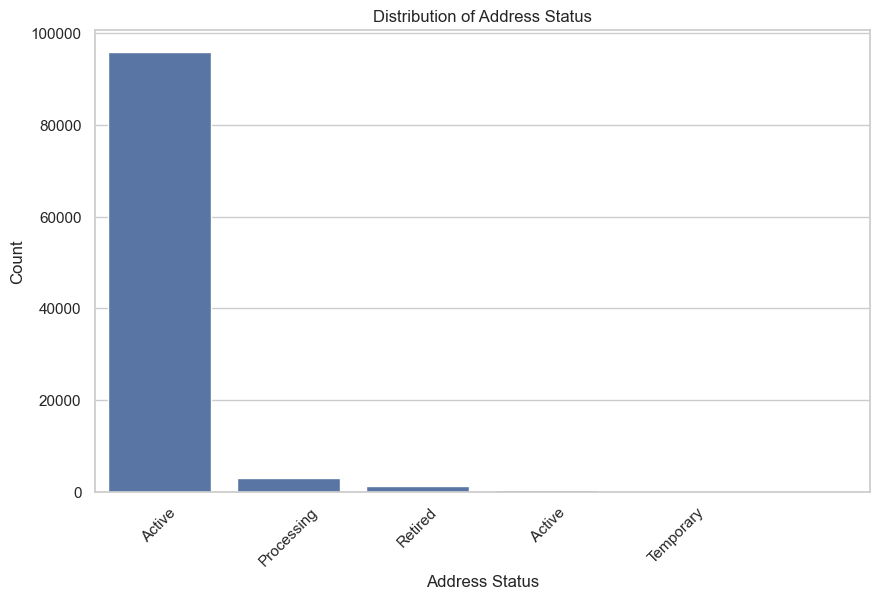

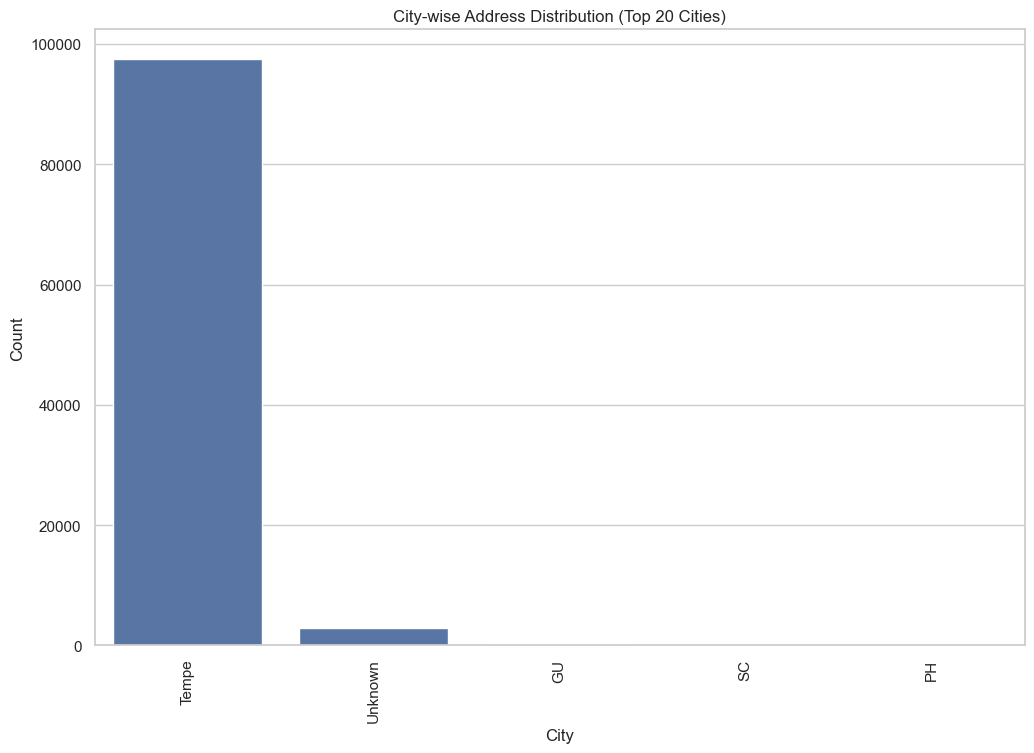

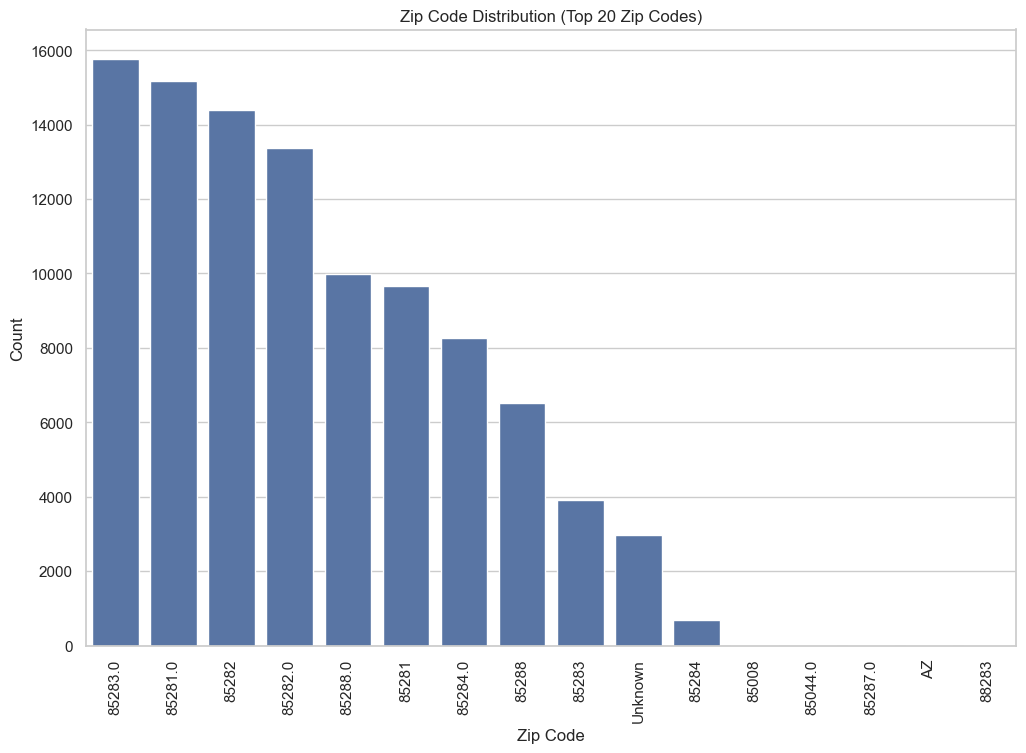

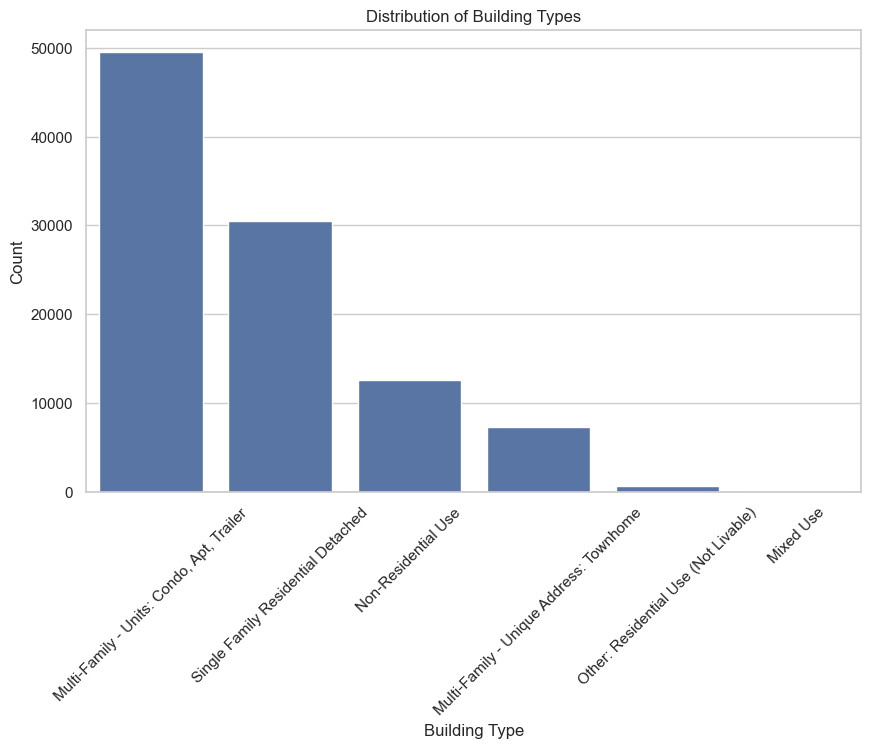

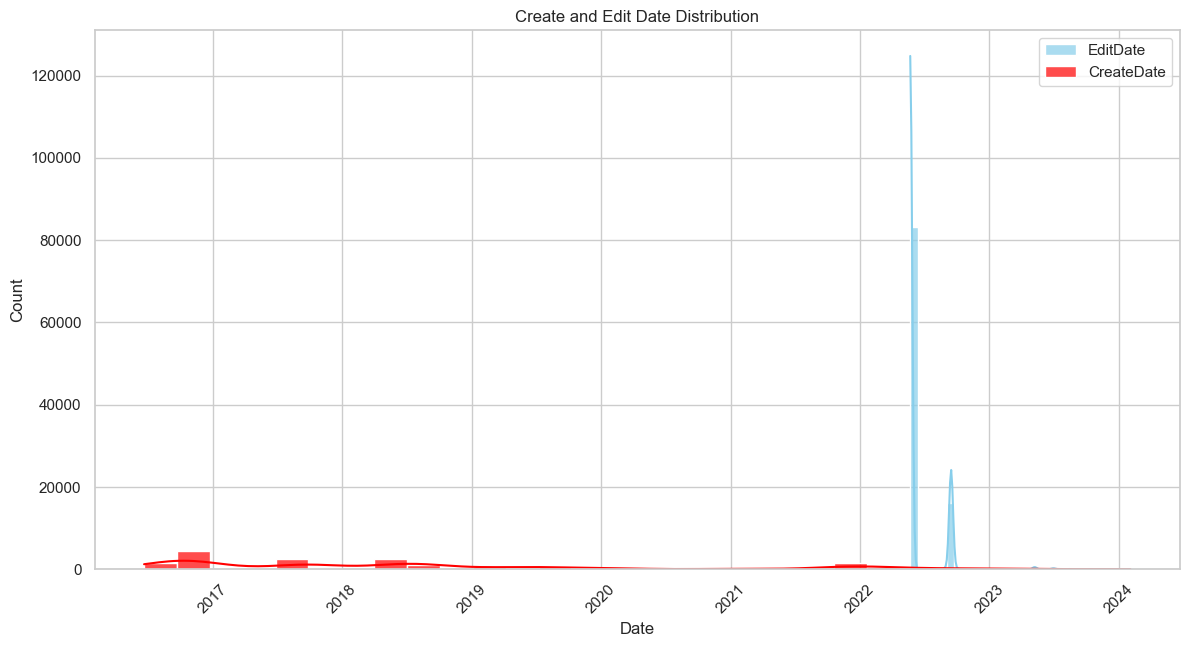

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the style for the plots
sns.set(style="whitegrid")

# 1. Address Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='AddressStatus', order=data_cleaned['AddressStatus'].value_counts().index)
plt.title('Distribution of Address Status')
plt.xlabel('Address Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2. City-wise Address Distribution (top 20 cities)
plt.figure(figsize=(12, 8))
top_cities = data_cleaned['City'].value_counts().head(20).index
sns.countplot(data=data_cleaned[data_cleaned['City'].isin(top_cities)], x='City', order=top_cities)
plt.title('City-wise Address Distribution (Top 20 Cities)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 3. Zip Code Distribution (top 20 zip codes)
plt.figure(figsize=(12, 8))
top_zipcodes = data_cleaned['ZipCode'].value_counts().head(20).index
sns.countplot(data=data_cleaned[data_cleaned['ZipCode'].isin(top_zipcodes)], x='ZipCode', order=top_zipcodes)
plt.title('Zip Code Distribution (Top 20 Zip Codes)')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 4. Building Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='BuildingType', order=data_cleaned['BuildingType'].value_counts().index)
plt.title('Distribution of Building Types')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 5. Create and Edit Date Distribution
# Convert 'CreateDate' and 'EditDate' to datetime for plotting
data_cleaned['CreateDate'] = pd.to_datetime(data_cleaned['CreateDate'], errors='coerce')
data_cleaned['EditDate'] = pd.to_datetime(data_cleaned['EditDate'], errors='coerce')

# Plotting the distribution of 'CreateDate' and 'EditDate'
plt.figure(figsize=(14, 7))
sns.histplot(data=data_cleaned, x='EditDate', bins=30, kde=True, color='skyblue', label='EditDate', alpha=0.7)
sns.histplot(data=data_cleaned, x='CreateDate', bins=30, kde=True, color='red', label='CreateDate', alpha=0.7)
plt.title('Create and Edit Date Distribution')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()


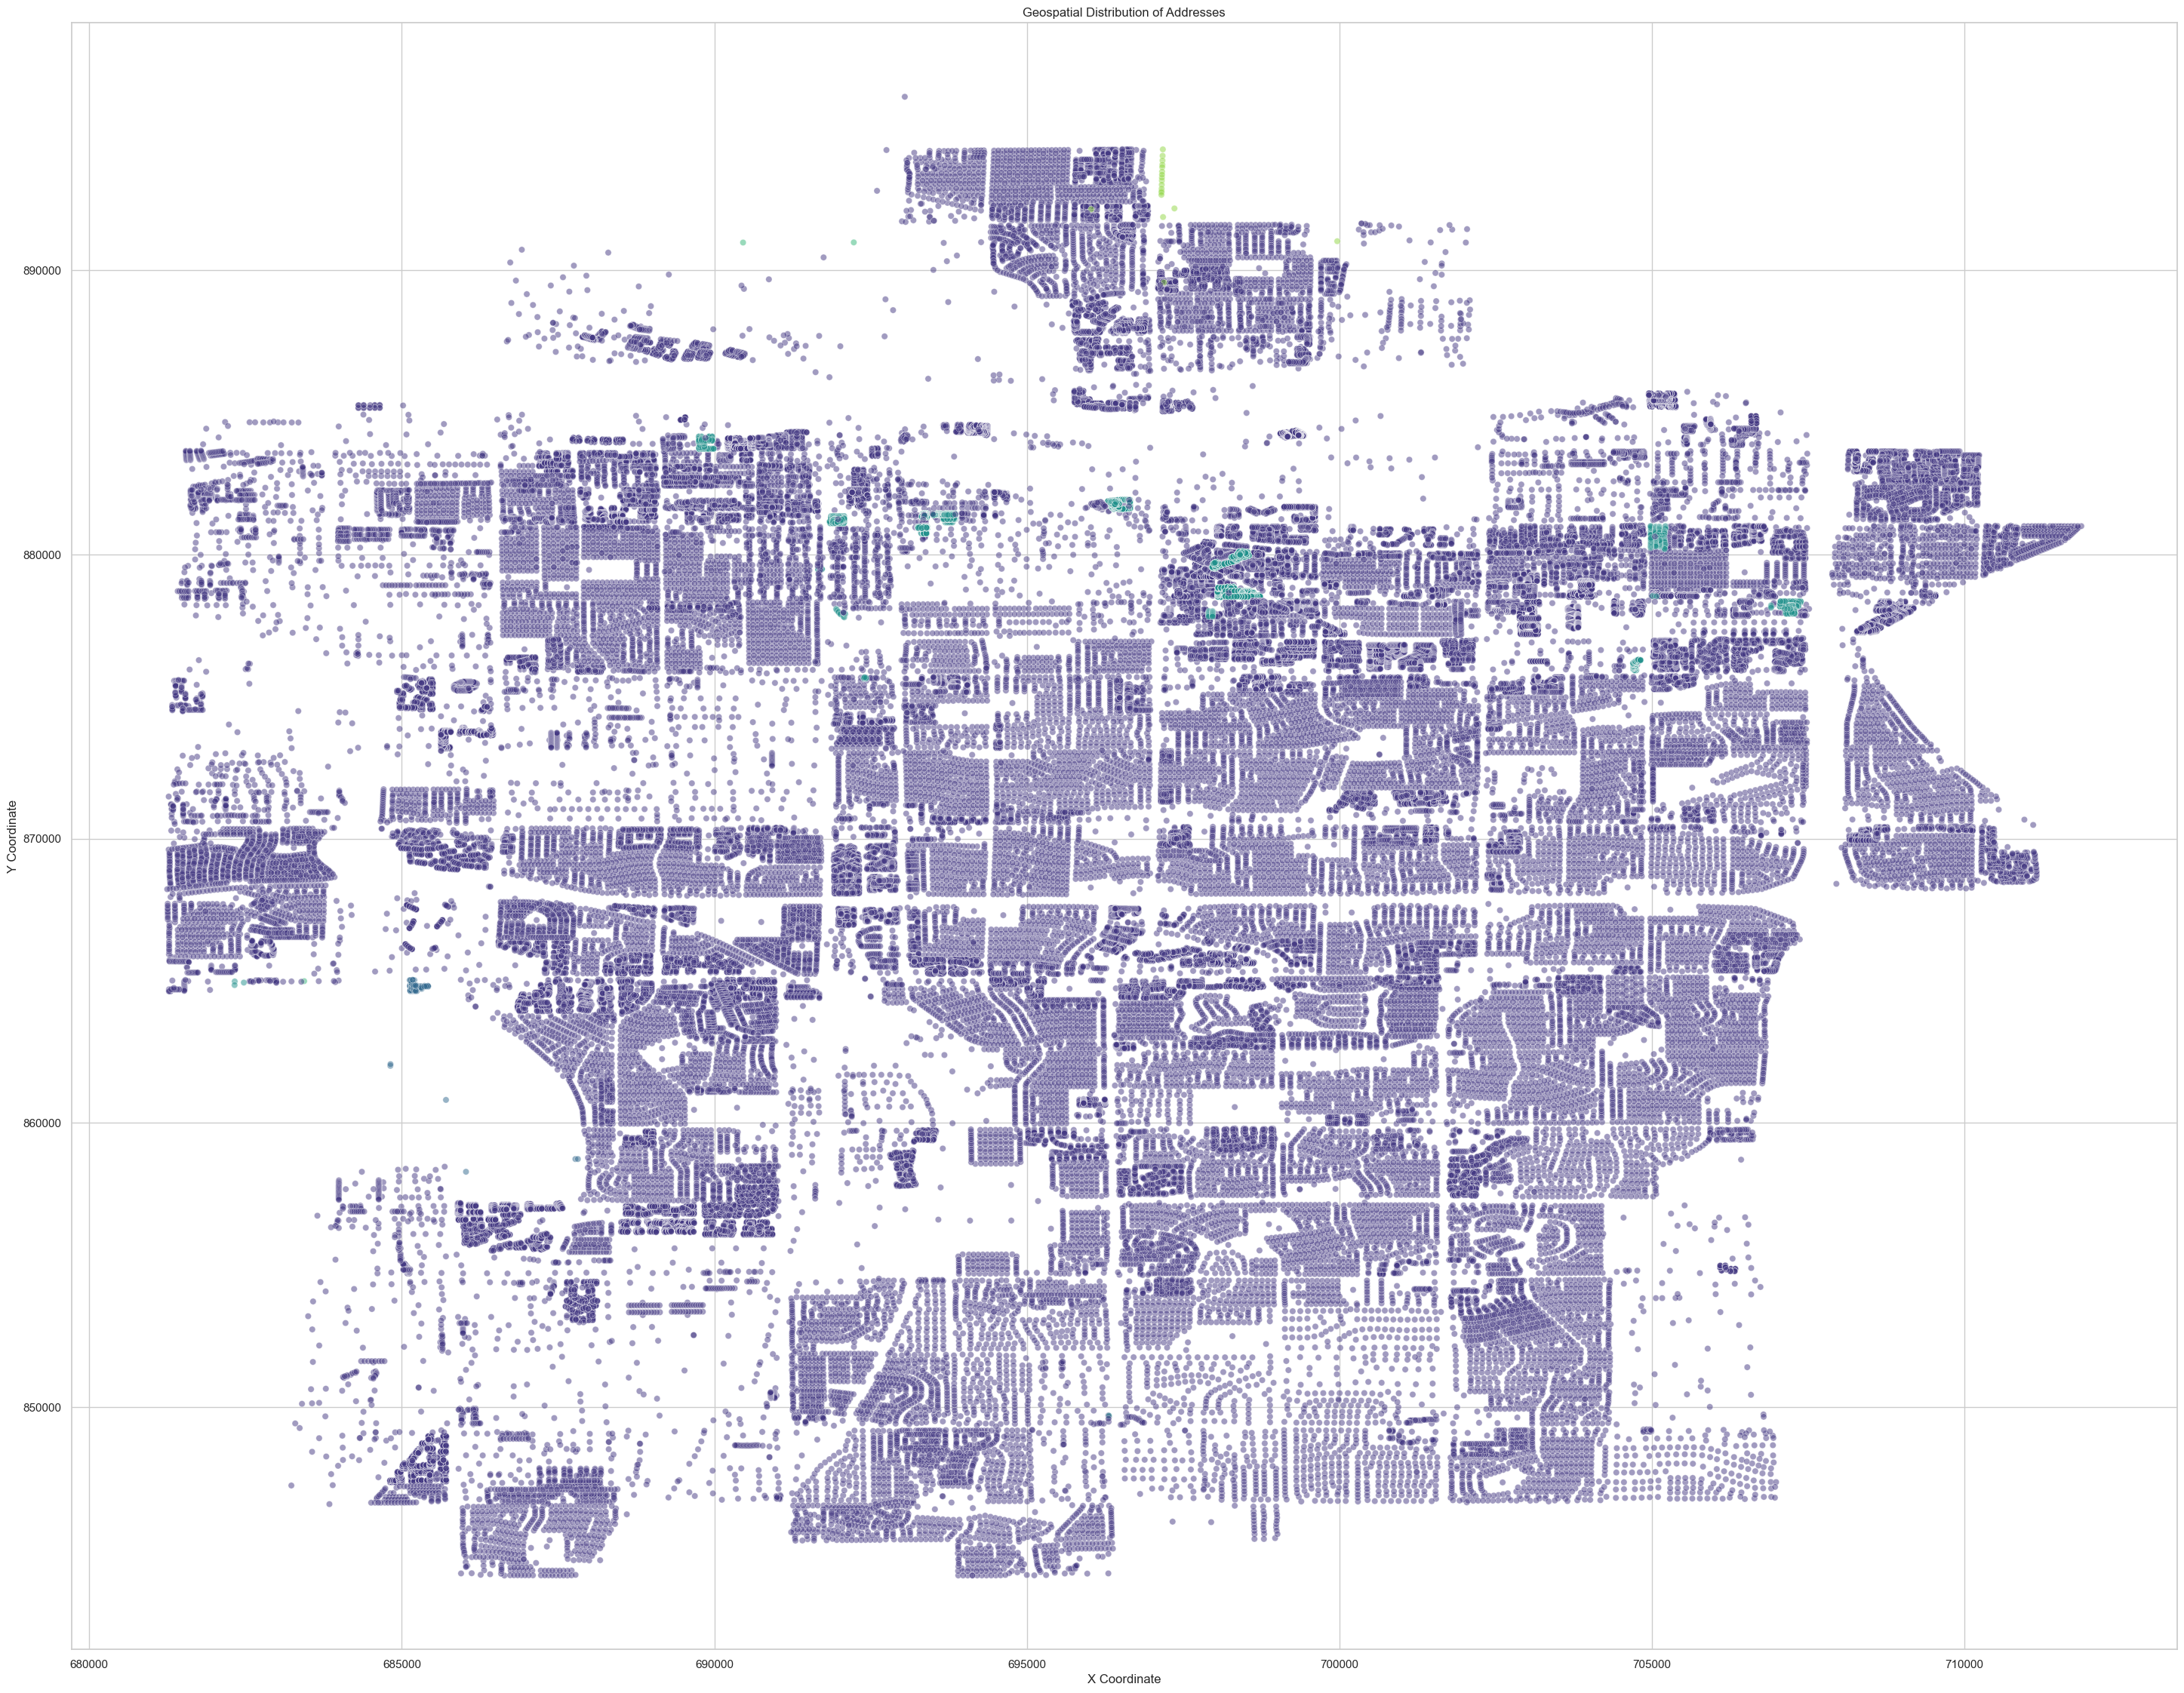

In [8]:
# Plotting Geospatial Distribution of Addresses using a scatter plot
plt.figure(figsize=(36, 28))
sns.scatterplot(data=data_cleaned, x='XCoordinate', y='YCoordinate', hue='City', alpha=0.5, palette='viridis', legend=False)
plt.title('Geospatial Distribution of Addresses')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


In [ ]:
# Importing necessary libraries for geospatial analysis
import geopandas as gpd
from shapely.geometry import Point
import folium
from sklearn.cluster import DBSCAN

# Filter out rows where XCoordinate or YCoordinate has NaN values
data_cleaned = data_cleaned.dropna(subset=['XCoordinate', 'YCoordinate'])

# Create a GeoDataFrame from the cleaned data
geometry = [Point(xy) for xy in zip(data_cleaned['XCoordinate'], data_cleaned['YCoordinate'])]
geo_df = gpd.GeoDataFrame(data_cleaned, geometry=geometry)

# Define a map centered around the mean coordinates
m = folium.Map(location=[geo_df['YCoordinate'].mean(), geo_df['XCoordinate'].mean()], zoom_start=10)

# Add points to the map
for _, row in geo_df.iterrows():
    folium.CircleMarker(
        location=(row['YCoordinate'], row['XCoordinate']),
        radius=1,
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Display the map
m
